# Advanced Modeling for Titanic Survival Prediction

After establishing a baseline understanding of the Titanic dataset through exploratory data analysis and initial predictive modeling, the next step involves applying advanced machine learning algorithms to enhance predictive performance and uncover deeper patterns in the data. Survival on the Titanic was influenced by a variety of interacting factors—such as passenger class, age, gender, and family connections—many of which are non-linear and not easily captured by simplistic models.

In this advanced modeling phase, we implement and compare the effectiveness of several powerful classification algorithms:

* **Logistic Regression**
* **Random Forest Classifier**
* **XGBoost Classifier**
* **Support Vector Machine (SVM)**

Each of these models brings unique strengths to the table. By comparing these models across evaluation metrics such as accuracy, precision, recall, and ROC-AUC, we aim to identify the most suitable approach for accurately predicting passenger survival. The outcome of this analysis will not only refine the predictive model but also provide insights into the critical factors that contributed to survival, shedding light on one of the most historically significant maritime disasters through the lens of modern data science.

# Import Libraries

In [1]:
# data structure and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# for saving and loading models
import pickle
import joblib
import datetime

# Load and Preapre Data for Modeling

## Load the dataset

In [2]:
#  read cleaned Titanic dataset
df = pd.read_csv("data/titanic_clean.csv")

In [3]:
df.head()

,survived,pclass,fare,alone,sex_male,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton
0,0,3,7.2500,False,True,True,False,False,True
1,1,1,71.2833,False,False,False,True,False,False
2,1,3,7.9250,True,False,False,True,False,True
3,1,1,53.1000,False,False,False,True,False,True
4,0,3,8.0500,True,True,True,False,False,True


## Split the dataset into input features (x) and target variable (y)

In [5]:
# inpurt features
x = df.drop(columns=['survived'], axis=1)

# target variable
y = df['survived']

In [6]:
# check features and target variable
print("Features:\n", x.head())
print()
print("\nTarget Variable:\n", y.head())

Features:
    pclass     fare  alone  sex_male  who_man  who_woman  \
0       3   7.2500  False      True     True      False   
1       1  71.2833  False     False    False       True   
2       3   7.9250   True     False    False       True   
3       1  53.1000  False     False    False       True   
4       3   8.0500   True      True     True      False   

   embark_town_Queenstown  embark_town_Southampton  
0                   False                     True  
1                   False                    False  
2                   False                     True  
3                   False                     True  
4                   False                     True  


Target Variable:
 0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


## Split the dataset into training and testing sets

In [7]:
# split data into training and testing sets (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

## Feature Scaling

In [ ]:
# fit on training data and transform both train and test sets
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [9]:
# Restore column names to scaled DataFrames for clarity and consistency
x_train_scale = pd.DataFrame(x_train_scale, columns=x_train.columns)
x_test_scale = pd.DataFrame(x_test_scale, columns=x_test.columns)

# Advanced Modeling

## Logistic Regression

### Train Logistic Regression Model

In [10]:
# create empty model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# train the model
lr_model.fit(x_train_scale, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Apply model to make predictions

In [11]:
# predict on training data
lr_train_pred = lr_model.predict(x_train_scale)

# predict on testing data
lr_test_pred = lr_model.predict(x_test_scale)

### Get predicted probabilities

In [12]:
# predict probabilities on training data
lr_train_proba = lr_model.predict_proba(x_train_scale)[:, 1]

# predict probabilities on testing data
lr_test_proba = lr_model.predict_proba(x_test_scale)[:, 1]

### Calculate Evaluation Metrics

In [13]:
# accuracy scores
lr_train_acc = accuracy_score(y_train, lr_train_pred)
lr_test_acc = accuracy_score(y_test, lr_test_pred)

# precision scores
lr_train_precision = precision_score(y_train, lr_train_pred)
lr_test_precision = precision_score(y_test, lr_test_pred)

# recall scores
lr_train_recall = recall_score(y_train, lr_train_pred)
lr_test_recalll = recall_score(y_test, lr_test_pred)

# f1 scores
lr_train_f1 = f1_score(y_train, lr_train_pred)
lr_test_f1 = f1_score(y_test, lr_test_pred)

### ROC Curve and AUC

In [14]:
# roc curve for training and testing data
fpr_train, tpr_train, _ = roc_curve(y_train, lr_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, lr_test_proba)

# calculate AUC for training and testing data
lr_train_auc = auc(fpr_train, tpr_train)
lr_test_auc = auc(fpr_test, tpr_test)

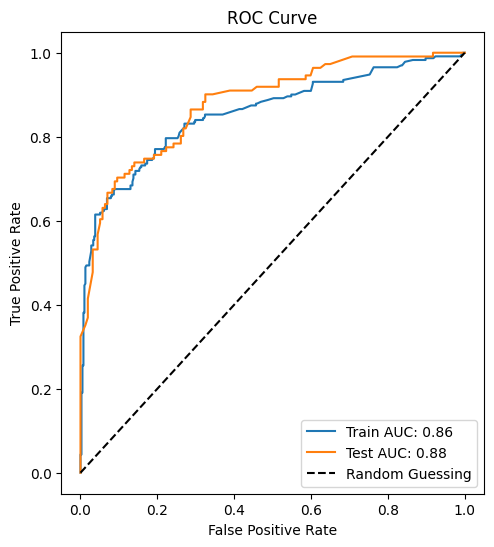

In [ ]:
# display results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, label=f'Train AUC: {lr_train_auc:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC: {lr_test_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()